In [1]:
import numpy as np
import pandas as pd
# Entorno Scikit Learn
from sklearn.neighbors import KNeighborsClassifier   # Algoritmo
from sklearn import metrics      # Metrica de desempeño ( para ver que tan bien se ajusta nuestro modelo a los datos)
from sklearn.model_selection import train_test_split    # Para dividir el conjunto de prueba y entrenamiento
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score   # Validación cruzada 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing           # Libreria para reescalar los datos
from sklearn.impute import SimpleImputer    # Libreria para trabajar con datos faltantes 
from sklearn.metrics import plot_confusion_matrix
# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# datos
data=pd.read_csv("https://raw.githubusercontent.com/Albertuff/Machine-Learning/master/datos/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Totalcharges es de tipo numerica, sin embargo están como tipo objeto. Vamos a convertir la variable a numerica
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# La variable target debe ser de tipo numerica, la transformamos:
data.Churn=(data.Churn=="Yes").astype(int)      # Si la condicion es verdadera el tipo de dato es 1, si es falsa entonces devuelve un cero

In [7]:
pd.value_counts(data.Churn)

0    5174
1    1869
Name: Churn, dtype: int64

In [8]:
data=data.fillna(0)                             # Los datos faltantes los llenamos con ceros

c:\Users\alber\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


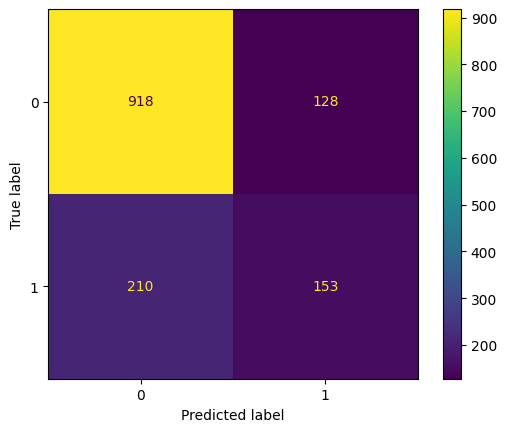

In [9]:
# Notamos cierto nivel de desvalanceo en la variable de respuesta. Será importante balancear los datos para evitar "trampas del algoritmo"
# la trampa es que prediga la clase mas frecuente.
# Importante: El balanceo es parte del pre-procesamiento

# Seleccionamos los atributos

X=data[["tenure","MonthlyCharges","TotalCharges"]]
Y=data["Churn"]
nombres=X.columns

# Definimos el conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

# Definimos el modelo
modelo=KNeighborsClassifier(n_neighbors=7)

# Entrenamos el modelo
modelo.fit(X_train,Y_train)

# Predicciones
predicciones=modelo.predict(X_test)

plot_confusion_matrix(modelo,X_test,Y_test)

In [10]:
# La exactitud es la proporción de los valores que mi modelo predicecorrectamente.
print("La exactitud es:",(918+153)/(918+128+210+153))

# La presición es la proporción de verdaderos predichos positivos que el modelo predice (clasifica) correctamente.
print("La presición es:",153/(128+153))

# La sensibilidad es la proporcion de valores predichos positivos que el modelo clasifica correctamente.
print("La sensibilidad (Recall) es:",153/(210+153))

# La especificidad es la proporcion de valores predichos negativos que el modelo clasifica correctamente.
print("La especificidad (Recall) es:",918/(918+128))

La exactitud es: 0.7601135557132718
La presición es: 0.5444839857651246
La sensibilidad (Recall) es: 0.4214876033057851
La especificidad (Recall) es: 0.8776290630975143


In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predicciones))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1046
           1       0.54      0.42      0.48       363

    accuracy                           0.76      1409
   macro avg       0.68      0.65      0.66      1409
weighted avg       0.74      0.76      0.75      1409



In [12]:
# Podemos calibrar el modelo para que sea lo mas sesible posible
# Vamos a hacer las predicciones de probabilidad
predicciones_prob=modelo.predict_proba(X_test)
predicciones_prob

array([[0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [1.        , 0.        ],
       ...,
       [0.85714286, 0.14285714],
       [0.28571429, 0.71428571],
       [0.85714286, 0.14285714]])

In [13]:
# Para cada cliente cual es la probabilidad de que abandone
predict_churn=predicciones_prob[:,1]
predict_churn

array([0.14285714, 0.14285714, 0.        , ..., 0.14285714, 0.71428571,
       0.14285714])

In [14]:
predict_churn>=0.5          # Predicciones por "default" de los algoritmos de clasificación con probabilidades

array([False, False, False, ..., False,  True, False])

In [21]:
predicciones=(predict_churn>=0.3).astype(int)       # Predicciones en terminos de respuesta del algoritmo
predicciones

array([0, 0, 0, ..., 0, 1, 0])

In [26]:
pd.crosstab(Y_test,predicciones,rownames=["Observados"],colnames=["Predichos"])

Predichos,0,1
Observados,,
0,805,241
1,153,210


In [23]:
print("Sensibilidad (recall)",324/(39+324))         #para 0.1
print("Especificidad (recall)",373/(373+673))

Sensibilidad (recall) 0.8925619834710744
Especificidad (recall) 0.3565965583173996


In [24]:
print("Sensibilidad (recall)",210/(210+153))        #para 0.3
print("Especificidad (recall)",805/(805+241))

Sensibilidad (recall) 0.5785123966942148
Especificidad (recall) 0.7695984703632888


In [28]:
# Observamos que modificando el valor del umbral (probabilidad) tenemos valores diferentes en la sensibilidad y la especificidad.
# ¿Cuando decimos que una prueba es buena?
    # R: Cuando es muy sensible y muy específica

print(classification_report(Y_test,predicciones))


              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1046
           1       0.47      0.58      0.52       363

    accuracy                           0.72      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.74      0.72      0.73      1409



In [40]:
y=[]    # Sensibilidades
x=[]    # 1-Especificidad

umbrales=np.arange(0,1.1,0.1)
for i in umbrales:
    predicciones=(predict_churn>=i).astype(int)
    metricas=classification_report(Y_test,predicciones,output_dict=True)
    y.append(metricas["1"]["recall"])
    x.append(1-metricas["0"]["recall"])

# Tabla ROC:
tabla_roc=pd.DataFrame()
tabla_roc["Probabilidad"]=umbrales
tabla_roc["Sensibilidad"]=y
tabla_roc["Especidicidad"]=x
tabla_roc

c:\Users\alber\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alber\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,Probabilidad,Sensibilidad,Especidicidad
0,0.0,1.000000,1.000000
1,0.1,0.892562,0.643403
2,0.2,0.760331,0.389101
3,0.3,0.578512,0.230402
4,0.4,0.578512,0.230402
5,0.5,0.421488,0.122371
6,0.6,0.286501,0.062141
7,0.7,0.286501,0.062141
8,0.8,0.137741,0.026769
9,0.9,0.038567,0.004780


Text(0.5, 1.0, 'Curva ROC. Churn')

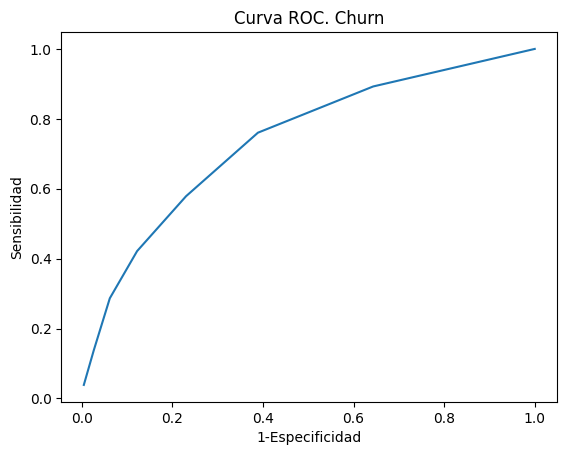

In [43]:
plt.plot(x,y)
plt.xlabel("1-Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC. Churn")